This notebook covers the steps taken to clean and analyze the Anime dataset, which we obtained from Kaggle  [here ](https://www.kaggle.com/datasets/mittvin/anime-dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Essential Libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [106]:
df=pd.read_csv("/content/drive/MyDrive/Anime_list7.csv")
df.tail()

,Anime_name,episode,duration,members,Score
14850,Code Geass: Lelouch of the Rebellion,TV (25 eps),Oct 2006 - Jul 2007,"2,469,345 members",NaN
14851,Cowboy Bebop,TV (26 eps),Apr 1998 - Apr 1999,"1,474,554 members",NaN
14852,Neon Genesis Evangelion,TV (26 eps),Oct 1995 - Mar 1996,"1,522,460 members",NaN
14853,One Punch Man,TV (12 eps),Oct 2015 - Dec 2015,"2,219,557 members",NaN
14854,Death Note,TV (37 eps),Oct 2006 - Jun 2007,"2,347,416 members",NaN


The output above provides a concise and brief overview of the dataset


### Info and Shape of the dataset

In [107]:
print(df.shape)
print('\n')
df.info()

(14855, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anime_name  14855 non-null  object 
 1   episode     14855 non-null  object 
 2   duration    14855 non-null  object 
 3   members     14855 non-null  object 
 4   Score       14850 non-null  float64
dtypes: float64(1), object(4)
memory usage: 580.4+ KB


The dataset has a shape of (14855, 5), which indicates that there are 14,850 rows and 5 columns.The dataset consists of a mix of float64 and object data types.

The above output shows that out of 5 features available in the dataset, 4 are of object data type and one is of float.

## Features of the Dataset

In [108]:
list_columns=df.columns.tolist()
print(list_columns)

['Anime_name', 'episode', 'duration', 'members', 'Score']



The dataset provides insights into various anime entries, offering a comprehensive look at each record.

**Key features include:**


*  Anime_name: The designated title of the anime
*  Episode: The count of episodes in the anime series.
*   Duration: The time span of the anime's release.
*  Members: The total number of associated members for the anime.
*  Score: The assigned rating score for the anime.







# Handling Missing data
After gaining familiarity with our dataset, the subsequent objective is to identify areas where information is missing. We'll initiate this process by locating these gaps throughout our entire dataset

 **Checking for missing values**

In [109]:
df.isna().sum()

Anime_name    0
episode       0
duration      0
members       0
Score         5
dtype: int64

Based on the obtained result, it's evident that our dataset has around 5 missing values.

In [111]:
df["Score"].fillna(df["Score"].median(),inplace=True)

**Checking for duplicate values**

In [112]:
duplicates = df.duplicated()
print(f"The total number of duplicate values in the dataset is {duplicates.sum()}")

The total number of duplicate values in the dataset is 14471


**Removing duplicates values**

In [113]:
df.drop_duplicates(keep='first', inplace=True)
print(f"The total number of duplicate values in the dataset is {df.duplicated().sum()}")


The total number of duplicate values in the dataset is 0


**Modifying and Creating new columns**

In [114]:
df['Show_Format'] = df['episode'].str.extract('(\w+)').astype('category')
df['episode'] = df['episode'].str.extract('(\d+)').astype(float)
df['members'] = df['members'].str.replace(',', '').str.extract('(\d+)').astype(float)
df.head()

,Anime_name,episode,duration,members,Score,Show_Format
0,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,3263142.0,9.09,TV
1,Steins;Gate,24.0,Apr 2011 - Sep 2011,2505884.0,9.07,TV
2,Gintama°,51.0,Apr 2015 - Mar 2016,614907.0,9.06,TV
3,Shingeki no Kyojin Season 3 Part 2,10.0,Apr 2019 - Jul 2019,2195508.0,9.05,TV
4,Bleach: Sennen Kessen-hen,13.0,Oct 2022 - Dec 2022,501080.0,9.04,TV


Here, the numeric and categorical values within the columns have been segregated into separate columns.

In [115]:
df['Start_Date'] = pd.to_datetime(df['duration'].str.split(' - ').str[0])
df['End_Date'] = pd.to_datetime(df['duration'].str.split(' - ').str[1])
df['Duration_Months'] = (df['End_Date'] - df['Start_Date']).dt.days // 30
df = df.drop(['Start_Date', 'End_Date','duration'], axis=1)
df.head()

,Anime_name,episode,members,Score,Show_Format,Duration_Months
0,Fullmetal Alchemist: Brotherhood,64.0,3263142.0,9.09,TV,15.0
1,Steins;Gate,24.0,2505884.0,9.07,TV,5.0
2,Gintama°,51.0,614907.0,9.06,TV,11.0
3,Shingeki no Kyojin Season 3 Part 2,10.0,2195508.0,9.05,TV,3.0
4,Bleach: Sennen Kessen-hen,13.0,501080.0,9.04,TV,2.0


converting the 'Anime_name' column to category type to maintain consistency

In [116]:
df['Anime_name']=df['Anime_name'].astype('category')

**The new dataset after cleaning**

In [117]:
print(df.shape)
print('\n')
print(list(df.columns))
print('\n')
df.info()

(384, 6)


['Anime_name', 'episode', 'members', 'Score', 'Show_Format', 'Duration_Months']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 14854
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Anime_name       384 non-null    category
 1   episode          381 non-null    float64 
 2   members          384 non-null    float64 
 3   Score            384 non-null    float64 
 4   Show_Format      384 non-null    category
 5   Duration_Months  373 non-null    float64 
dtypes: category(2), float64(4)
memory usage: 27.2 KB


##Summary Statistics:

**Spliting the dataset into Numeric and Categorical Columns**

In [118]:
categorical_columns = df.select_dtypes(include=['category'])
numeric_columns = df.select_dtypes(include=['number'])

**statistical information for numeric columns**

In [119]:
description=numeric_columns.describe()
print(description)

          episode       members       Score  Duration_Months
count  381.000000  3.840000e+02  384.000000       373.000000
mean    17.879265  6.308742e+05    8.466823         4.573727
std     32.640806  6.732057e+05    0.211508        10.769484
min      1.000000  8.904000e+03    8.210000         0.000000
25%      1.000000  1.813775e+05    8.300000         0.000000
50%     12.000000  3.925050e+05    8.410000         2.000000
75%     24.000000  8.297448e+05    8.590000         5.000000
max    500.000000  3.848692e+06    9.090000       122.000000


 The above code provides summary statistics of the central tendency, dispersion, and shape of the distribution of a dataset of numerical dtype.

 **Key observations:**


*   The ‘episode’ column exhibits a wide range of values (1-500), with a notable concentration at
the lower side.
*  Score tends to lean towards the range of 8.21 to 8.59 as indicated by the percentiles.

*   The ‘members’ column indicates a wide range of values reflecting the varying level of
audience engagement.
*   The ‘Duration_Months’ provides insight into the duration period of the anime, with considerable amount having 0 months, indicating shorter formats like Movies or Specials.






**For categorical columns**

In [122]:
description=categorical_columns.describe()
print(description)

                                             Anime_name Show_Format
count                                               384         384
unique                                              348           5
top     Kage no Jitsuryokusha ni Naritakute! 2nd Season          TV
freq                                                  5         251


The following significant findings are obtained from the categorical data analysis:



*   **'Anime_name'** contains 348 unique values indicating diverse array of anime in the dataset.

*  **'Show_Format'**  has 5 unique values representing different show formats with “TV” being the
most prevalent.






## Data Visualization

**Univariate Analysis**

**For categorical Variable**

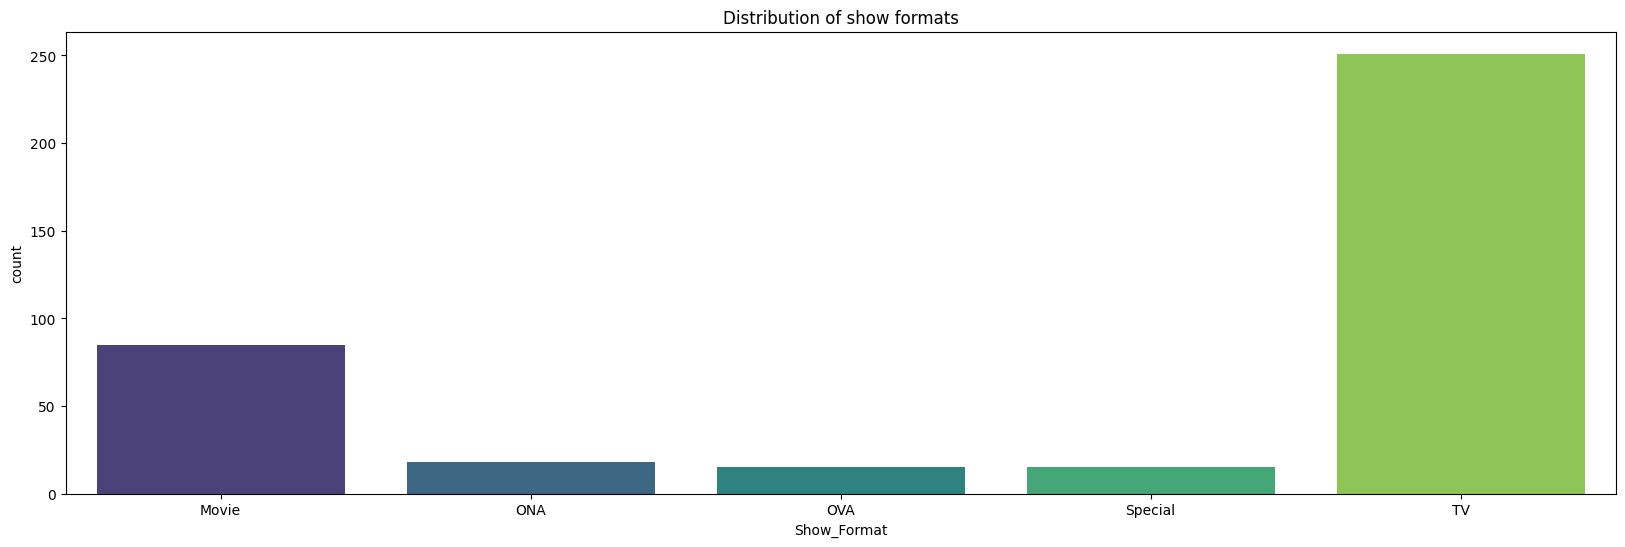

TV         251
Movie       85
ONA         18
OVA         15
Special     15
Name: Show_Format, dtype: int64

In [123]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Show_Format', data=df, palette='viridis')
plt.title('Distribution of show formats')
plt.show()
df["Show_Format"].value_counts()

Here,the “TV” format emerges as the most frequent with almost 245 instances, followed by the Movie format with around 85 instances. Other formats like special, ONA and OVA are also present in the dataset but with minimal count not exceeding 20

**For numeric variables**

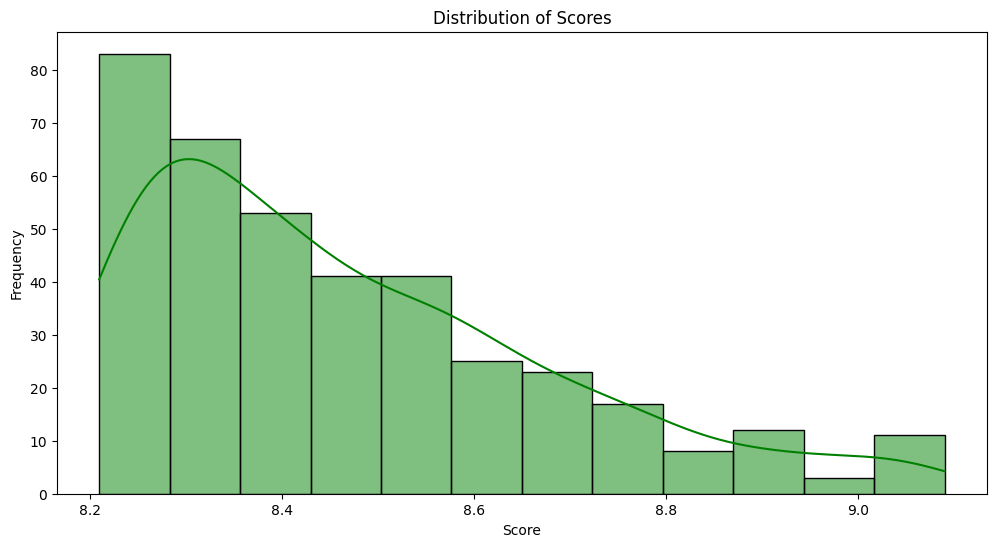

8.41    15
8.30    15
8.21    14
8.28    13
8.22    11
        ..
8.84     1
8.78     1
8.76     1
8.74     1
9.09     1
Name: Score, Length: 76, dtype: int64


In [124]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Score'], kde=True, color='green')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
print(df['Score'].value_counts())

Here, The concentration for the score is highly noticeable for the score in the range of 8.2 to 8.3 with the mode being somewhere around 8.35. The frequency for the score of 9 and above is minimal.

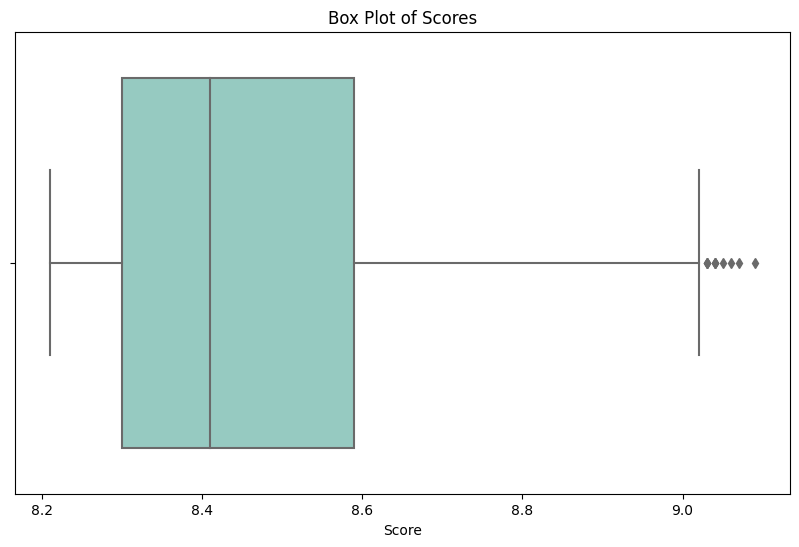

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Score'],palette='Set3')
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()


It reveals that the minimum value is around 8.21 and maximum is around 9.2. The presence of outliers can also be visualized from the box plot. The interquartile range (IQR) of the boxplot is inclined towards the first quartile, suggesting the concentration of scores towards the lower range. The median line inside the box can be seen aligned at the value 8.41, representing the central tendency of the score.

**Bivariate Analysis**

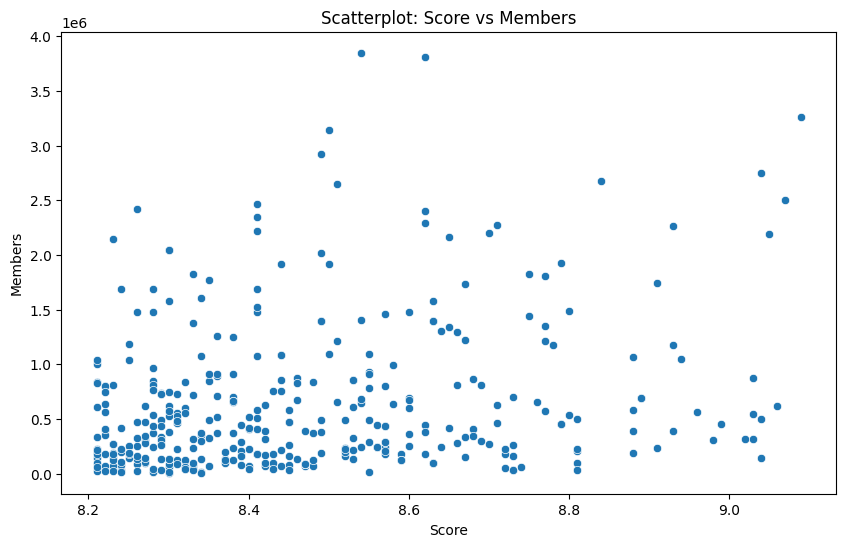

In [126]:
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='members', data=df)
plt.title('Scatterplot: Score vs Members')
plt.xlabel('Score')
plt.ylabel('Members')
plt.show()


The scatterplot suggests that there is a positive correlation between the members and score. In general, the increase in members count is suggesting a increasing in score. However, this relationship is not consistently linear. There are instances where they are not directly proportional. Higher score can be observed despite relatively low member counts.

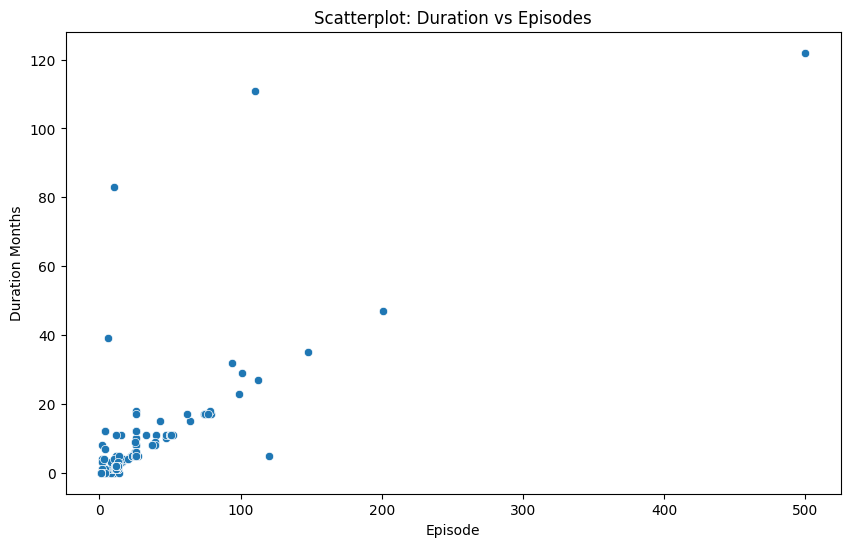

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Duration_Months', x='episode', data=df)
plt.title('Scatterplot: Duration vs Episodes')
plt.ylabel('Duration Months')
plt.xlabel('Episode')
plt.show()

The scatterplot indicates that there is a positive correlation between the episodes and duration months. It is evident that, the increase in episode count is showing increase in the duration months. However, there are still few instances where higher number of episodes doesn’t lead to longer duration period.

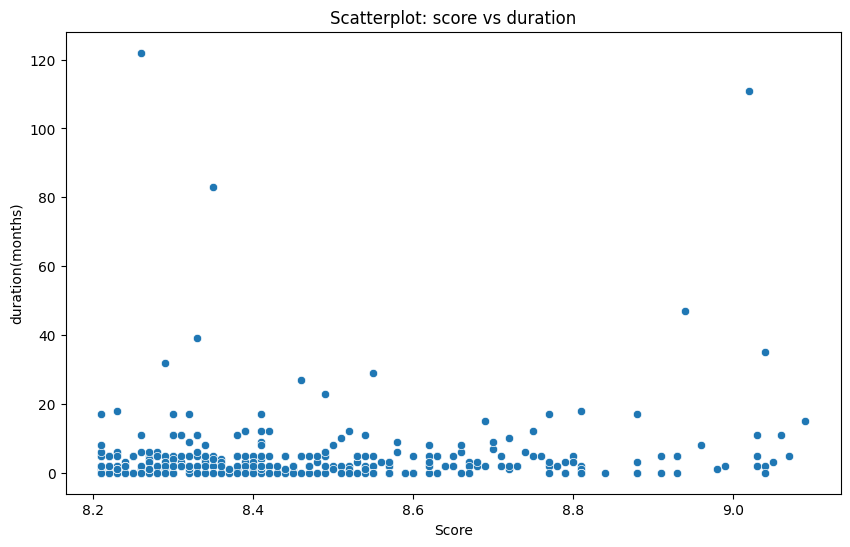

In [128]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Duration_Months', data=df)
plt.title('Scatterplot: score vs duration')
plt.xlabel('Score')
plt.ylabel('duration(months)')
plt.show()



The scatterplot shows a horizontal spread with points clustered at left side. This indicates that there is no any distinct pattern or correlation between the two features. The scores seem to gather around a specific range on the lower side. The dispersion implies that the connection between duration period and score is not very strong.

*Since duration period and episode show positive correlation  the scatterplot between score and episodes provides similar result to the analysis above.*

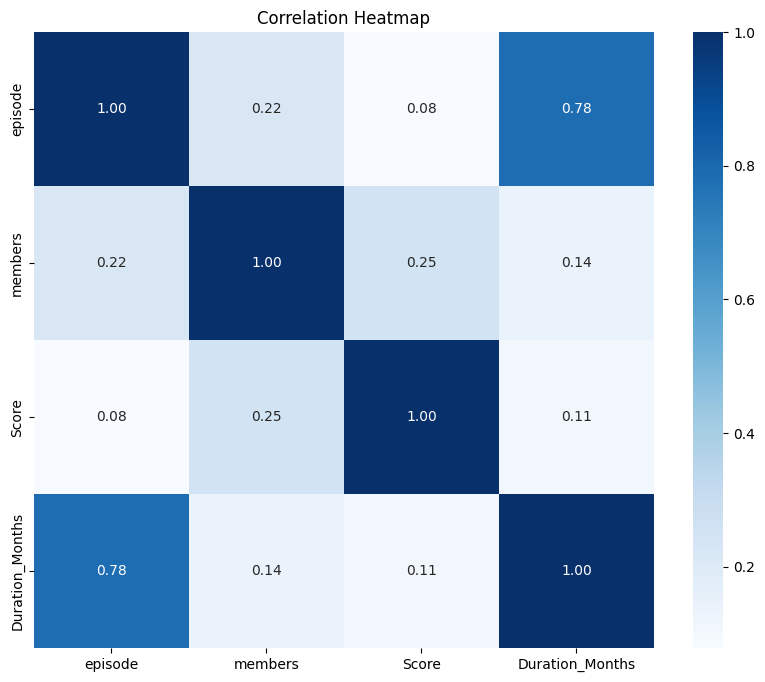

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True,cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The score and members indicate a slight positive correlation (0.25) between them. A stronger positive correlation (0.78) can be observed between episode and duration months. Likewise, there is a weak correlation (0.11) among score and duration. The score and episode displayed the weakest correlation (0.08).

## **Conclusion**

In conclusion, the dataset revealed some interesting facts. The univariate analysis revealed that the most of the shows are TV format and the majority of the scores are in the range of 8.2 To 8.5. The scatter plot helped us to visualize that when more people watched anime, the score tends to increase. Though this is not always the case. Additionally, there is a connection between the episode of the anime and its duration. This analysis provides us a good insight on how anime’s score is affected by various factors.